In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-2.csv'
df2 = pd.read_csv(url)

In [3]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [4]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [5]:
df4 = df4.dropna()
df4.shape

(1099, 19)

In [6]:
df4['playlist_id'].value_counts()

4hKPJNFIhdAg4pAksn78FJ    11
3ykXidKLz1eYPvuGoFlD1e    11
5jROYSZSL7cO0jGAqkPx7C    10
1qXg9ck25tBRxeXsj8mbDG    10
4NlAd9NpIa92IjErMyAriM    10
                          ..
37i9dQZF1DWUlCmB8llCTB     1
37i9dQZF1DWY3UKS6jvnxr     1
396llvvFOIB9jgPg0kqNDb     1
2ji5tRQVfnhaX1w9FhmSzk     1
37i9dQZF1DXcZDD7cfEKhW     1
Name: playlist_id, Length: 359, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [8]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [9]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [10]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [13]:
df5.head(2)

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,language,emotion
0,41,rock,0.682,0.401,2,-10.068,1,0.0236,0.2790,0.01170,0.0887,0.566,97.091,tl,6
1,28,rock,0.303,0.880,9,-4.739,1,0.0442,0.0117,0.00994,0.3470,0.404,135.225,en,1


In [14]:
cols = ['language', 'playlist_genre']
df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [15]:
df11 = df5

In [16]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [17]:
df12 = df11.set_index('track_name')

In [18]:
testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [19]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(1099, 14)

In [20]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [21]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [22]:
df5.shape
scaler = MinMaxScaler()

In [23]:
df5['emotion'].value_counts()

1     393
6     137
3     108
5     103
7      91
2      91
4      67
8      39
10     38
9      32
Name: emotion, dtype: int64

In [24]:
train_data_001 = df5.iloc[:1024,6:14]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
train_data_01.shape

(1024, 8)

In [25]:
testdf1_2 = testdf1_1.iloc[:1024,6:14]
testdf2_2 = testdf2_1.iloc[:1024,6:14]
testdf3_2 = testdf3_1.iloc[:1024,6:14]
df13 = df12.iloc[:1024,6:14]

In [26]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [27]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [28]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [29]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [30]:
discriminator = Discriminator()

In [31]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [32]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

In [33]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [34]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]
losses_g =[]
losses_d = []
labels = []
pred = []
true = []

In [35]:
#len(labels[0])

In [36]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.rand((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()


        # Data for training the generator
        latent_space_samples = torch.rand((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        losses_g.append(loss_generator)
        losses_d.append(loss_discriminator)

        labels.append(all_samples_labels)
        pred.append(output_discriminator)
        true.append(all_samples)

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 0.7074892520904541
Epoch: 0 Loss G.: 0.942609965801239
Epoch: 10 Loss D.: 0.30674922466278076
Epoch: 10 Loss G.: 1.6744585037231445
Epoch: 20 Loss D.: 0.43234097957611084
Epoch: 20 Loss G.: 1.7192213535308838
Epoch: 30 Loss D.: 0.516701340675354
Epoch: 30 Loss G.: 0.7949938178062439
Epoch: 40 Loss D.: 0.2421971708536148
Epoch: 40 Loss G.: 2.185936212539673
Epoch: 50 Loss D.: 0.23319344222545624
Epoch: 50 Loss G.: 2.9709300994873047
Epoch: 60 Loss D.: 0.8547567129135132
Epoch: 60 Loss G.: 2.1361589431762695
Epoch: 70 Loss D.: 0.4713559150695801
Epoch: 70 Loss G.: 1.345654845237732
Epoch: 80 Loss D.: 0.4158858358860016
Epoch: 80 Loss G.: 1.2681262493133545
Epoch: 90 Loss D.: 0.47758522629737854
Epoch: 90 Loss G.: 1.297799825668335
Epoch: 100 Loss D.: 0.42108646035194397
Epoch: 100 Loss G.: 1.5661602020263672
Epoch: 110 Loss D.: 0.37976908683776855
Epoch: 110 Loss G.: 1.2646101713180542
Epoch: 120 Loss D.: 0.5398399829864502
Epoch: 120 Loss G.: 0.8608037829399109
Epoch: 

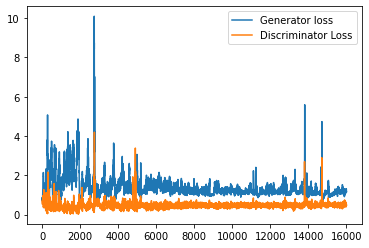

In [37]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.show()

In [38]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [39]:
latent_space_samples[:10]

tensor([[0.1961, 0.0814, 0.4970, 0.3276, 0.3165, 0.5341, 0.2196, 0.7614],
        [0.7450, 0.2675, 0.8901, 0.4185, 0.1595, 0.6739, 0.5098, 0.2256],
        [0.3303, 0.7018, 0.6145, 0.2962, 0.7214, 0.7363, 0.8519, 0.1997],
        [0.3982, 0.5788, 0.6559, 0.3149, 0.3003, 0.1301, 0.5670, 0.5705],
        [0.8150, 0.0579, 0.1743, 0.3022, 0.5946, 0.6948, 0.1656, 0.6841],
        [0.6341, 0.3086, 0.0640, 0.1352, 0.7608, 0.3795, 0.5200, 0.1162],
        [0.5220, 0.5874, 0.6209, 0.9065, 0.1523, 0.7271, 0.3477, 0.9635],
        [0.0293, 0.3850, 0.4702, 0.6995, 0.2267, 0.0309, 0.6473, 0.5303],
        [0.9125, 0.1025, 0.9434, 0.9731, 0.7805, 0.1307, 0.6237, 0.1239],
        [0.6002, 0.3394, 0.9071, 0.2466, 0.4549, 0.1623, 0.8898, 0.8726]])

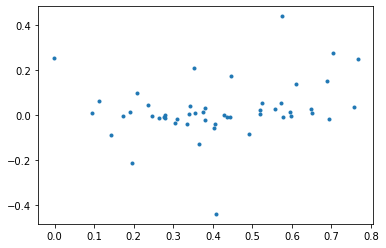

In [40]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [41]:
from scipy.spatial import distance

In [42]:
float_x = real_samples[0].double()

In [43]:
float_x = list(float_x.numpy())

In [44]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.175


In [45]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [47]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [48]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [49]:
def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cos.append(rec_score)
  rec_idx = df13.index[rec_index]
  cos_name.append(rec_idx)
  rec_len = len(recommended)
  results1.append(['index:',rec_idx,'; cos sim:',rec_score])

In [50]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_euc.append(rec_score)
  rec_idx = df13.index[rec_index]
  euc_name.append(rec_idx)
  rec_len = len(recommended)
  results2.append(['index:',rec_idx,'; euclid sim:',rec_score])

In [51]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 0.837


In [52]:
# pick recommendations with cosine similarity
results1 =[]
cos_name =[]
rec_cos = []
for i in generated_vals2:
  a = cos_similarity(i,train_data_vals2)

In [53]:
cols2 = ['language']
cos_rec =  df4[df4['track_name'].isin(cos_name)]
cos_rec2 = cos_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cos_rec2[cols2] = cos_rec2[cols2].apply(LabelEncoder().fit_transform)
cos_rec3 = cos_rec2.iloc[:1024,6:14]

In [54]:
cos_rec4=[]
for i, j in cos_rec3.iterrows():
  cos_rec4.append(j.values)

In [55]:
cos_rec3['track_name'] = df4['track_name']
cos_rec5 = cos_rec3.set_index('track_name')

In [56]:
rec_cose=[]
for i in rec_cos:
  rec_cose.append(i[0][0])

In [57]:
# pick recommendations with euclidean similarity
results2 =[]
euc_name =[]
rec_euc = []
for i in generated_vals2:
  a = euclid_similarity(i,train_data_vals2)

In [58]:
euc_rec =  df4[df4['track_name'].isin(euc_name)]
euc_rec2 = euc_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
euc_rec2[cols2] = euc_rec2[cols2].apply(LabelEncoder().fit_transform)
euc_rec3 = euc_rec2.iloc[:1024,6:14]

In [59]:
euc_rec4=[]
for i, j in euc_rec3.iterrows():
  euc_rec4.append(j.values)

In [60]:
euc_rec3['track_name'] = df4['track_name']
euc_rec5 = euc_rec3.set_index('track_name')

In [61]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [62]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [63]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT1.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT1.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [64]:
#compare recomendations to test subjects
rec_cosT1 = []
for i in test_data1:
  a = cos_similarity_t1(i,cos_rec4)

len train data: 47 ; index: LUNA ; cos sim: [[0.9999841]]
len train data: 47 ; index: LUNA ; cos sim: [[0.9999654]]
len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99995711]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99998848]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99995792]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99997355]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99996732]]
len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99996181]]
len train data: 47 ; index: LUNA ; cos sim: [[0.9999583]]
len train data: 47 ; index: She's Playing Hard To Get ; cos sim: [[0.99997417]]


In [65]:
rec_coseT1=[]
for i in rec_cosT1:
  rec_coseT1.append(i[0][0])

In [66]:
rec_eucT1 = []
for i in test_data1:
  a = euclid_similarity_t1(i,euc_rec4)

len train data: 50 ; index: Super Bass ; euclid sim: 2.3521975424045705
len train data: 50 ; index: I Would Like ; euclid sim: 2.2669520484562535
len train data: 50 ; index: Criminal ; euclid sim: 2.3278768718512586
len train data: 50 ; index: Big Area ; euclid sim: 2.0620359563897046
len train data: 50 ; index: Did It Again ; euclid sim: 2.5379730613227536
len train data: 50 ; index: M'$ ; euclid sim: 2.2738508262416866
len train data: 50 ; index: Super Bass ; euclid sim: 2.5591329795315594
len train data: 50 ; index: Long Road To Ruin ; euclid sim: 2.3788317744846927
len train data: 50 ; index: Ronca ; euclid sim: 5.104915744897253
len train data: 50 ; index: Tell Me You Love Me - NOTD Remix ; euclid sim: 1.4938729564503488


In [67]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT2.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT2.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [68]:
#compare recomendations to test subjects
rec_cosT2 = []
for i in test_data2:
  a = cos_similarity_t2(i,cos_rec4)

len train data: 47 ; index: LUNA ; cos sim: [[0.99997501]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99998153]]
len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99994833]]
len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99996062]]
len train data: 47 ; index: LUNA ; cos sim: [[0.9999686]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99999511]]
len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99995496]]
len train data: 47 ; index: LUNA ; cos sim: [[0.9999855]]
len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99995779]]
len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99995216]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99998871]]


In [69]:
rec_coseT2=[]
for i in rec_cosT2:
  rec_coseT2.append(i[0][0])

In [70]:
rec_eucT2 = []
for i in test_data2:
  a = euclid_similarity_t2(i,euc_rec4)

len train data: 50 ; index: Tell Me You Love Me - NOTD Remix ; euclid sim: 2.009119326492083
len train data: 50 ; index: Bad By Myself ; euclid sim: 2.1758954748982515
len train data: 50 ; index: Kannste ma sehn ; euclid sim: 1.1997456772166415
len train data: 50 ; index: In Only Seven Days - Remastered 2011 ; euclid sim: 2.299551525585961
len train data: 50 ; index: So Good (feat. Raekwon) ; euclid sim: 2.573087919248972
len train data: 50 ; index: Rump Shaker ; euclid sim: 2.0
len train data: 50 ; index: Born To Be Yours ; euclid sim: 2.267389320341789
len train data: 50 ; index: Just Got Paid ; euclid sim: 2.0
len train data: 50 ; index: Oh! Sweet Nuthin' - 2015 Remastered ; euclid sim: 2.373144323466232
len train data: 50 ; index: Rump Shaker ; euclid sim: 2.4835864105160543
len train data: 50 ; index: Ronca ; euclid sim: 26.17770906907059


In [71]:
def cos_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT3.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT3.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [72]:
#compare recomendations to test subjects
rec_cosT3 = []
for i in test_data3:
  a = cos_similarity_t3(i,cos_rec4)

len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99996047]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99997699]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99999009]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99998899]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99998379]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99998042]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99998487]]
len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99991422]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99998999]]
len train data: 47 ; index: LUNA ; cos sim: [[0.99998022]]
len train data: 47 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99995114]]


In [73]:
rec_coseT3=[]
for i in rec_cosT3:
  rec_coseT3.append(i[0][0])

In [74]:
rec_eucT3 = []
for i in test_data3:
  a = euclid_similarity_t3(i,euc_rec4)

len train data: 50 ; index: What Do You Love ; euclid sim: 2.5095959856104777
len train data: 50 ; index: Did It Again ; euclid sim: 2.588960588730544
len train data: 50 ; index: Do Right ; euclid sim: 2.8141408031582174
len train data: 50 ; index: Encanto ; euclid sim: 3.124650736007786
len train data: 50 ; index: Do Right ; euclid sim: 2.8668120739943874
len train data: 50 ; index: Ronca ; euclid sim: 6.799814318236909
len train data: 50 ; index: If I Ever Lose My Faith In You ; euclid sim: 2.8767284623335456
len train data: 50 ; index: Bad By Myself ; euclid sim: 2.6089705591286396
len train data: 50 ; index: Big Area ; euclid sim: 2.446804252375737
len train data: 50 ; index: Oh! Sweet Nuthin' - 2015 Remastered ; euclid sim: 2.1524309662628798
len train data: 50 ; index: Do Right ; euclid sim: 2.57786183687179


In [75]:
rec_coseT1.extend(rec_coseT2)

In [76]:
rec_coseT1.extend(rec_coseT3)

In [96]:
print(rec_coseT1)

[0.9999841037516034, 0.9999653991692578, 0.9999571093751635, 0.9999884803618749, 0.9999579153987349, 0.9999735526601331, 0.9999673159463939, 0.9999618072137214, 0.9999582986721756, 0.9999741687424798, 0.9999750121659532, 0.9999815343658153, 0.9999483307385868, 0.999960624909092, 0.9999685976066536, 0.99999510692748, 0.9999549637090531, 0.9999854969054314, 0.9999577883925294, 0.9999521596425054, 0.9999887142489676, 0.9999604695702495, 0.9999769918050142, 0.9999900877877266, 0.9999889904713053, 0.9999837929241631, 0.9999804223994133, 0.9999848743965635, 0.9999142242033856, 0.9999899927658477, 0.9999802222720939, 0.9999511351955994]


In [78]:
rec_eucT1.extend(rec_eucT2)
rec_eucT1.extend(rec_eucT3)

In [79]:
print(rec_eucT1)

[2.3521975424045705, 2.2669520484562535, 2.3278768718512586, 2.0620359563897046, 2.5379730613227536, 2.2738508262416866, 2.5591329795315594, 2.3788317744846927, 5.104915744897253, 1.4938729564503488, 2.009119326492083, 2.1758954748982515, 1.1997456772166415, 2.299551525585961, 2.573087919248972, 2.0, 2.267389320341789, 2.0, 2.373144323466232, 2.4835864105160543, 26.17770906907059, 2.5095959856104777, 2.588960588730544, 2.8141408031582174, 3.124650736007786, 2.8668120739943874, 6.799814318236909, 2.8767284623335456, 2.6089705591286396, 2.446804252375737, 2.1524309662628798, 2.57786183687179]


In [91]:
EMrec_eucT1 = [3.1794949929867675, 2.2247396566789623, 2.3834931344772268, 
               1.7795386312187729, 4.131295387483819, 1.782733242349986, 2.2968121037646902, 
               5.667416601998549, 5.338334433645116, 0.6905423013886464, 2.244228256680679, 
               1.3170121934449535, 2.7746301663465065, 1.5439326037093688, 2.0031029244857925, 
               2.0484200979105913, 1.1461071213459935, 1.1926341643682326, 3.4386030375720917, 
               1.6234789433756147, 9.200148453280523, 1.6392889935768629, 4.202008981427813, 
               1.6396474511260046, 3.10060616783637, 1.6719271526427204, 6.492919261780452, 
               1.1699436832052363, 2.831385897118225, 1.0, 2.67127813089678, 5.366725732697733]

In [97]:
# leven test for equal variance p-value lower than 0.01 means not equal
from scipy.stats import levene
stat, p = levene(rec_eucT1, EMrec_eucT1)
print('pvalue > 0.01 means equal variance, pvalue:' ,p)

pvalue > 0.01 means equal variance, pvalue: 0.9424194189804015


In [98]:
from scipy import stats
stats.ttest_ind(rec_eucT1, EMrec_eucT1,equal_var = True)

Ttest_indResult(statistic=0.6230663363516548, pvalue=0.5355262207785649)

In [100]:
print(len(rec_eucT1))
print(len(EMrec_eucT1))

32
32


The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.0595) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.